## 1. Bài toán đếm số tổ hợp.

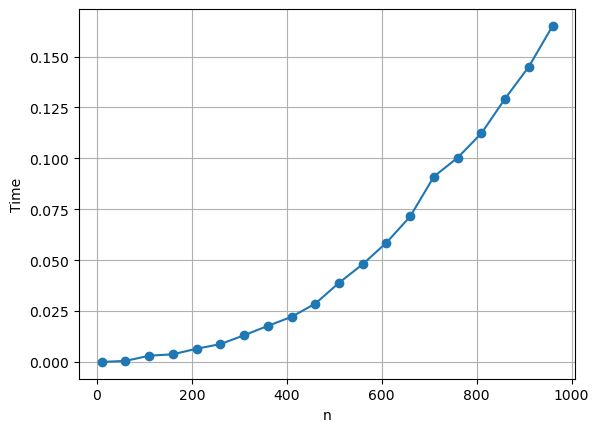

In [43]:
def dem_to_hop(n, k):
    dp = {}

    for i in range(n + 1):
        for j in range(min(i, k) + 1):
            if j == 0 or j == i:
                dp[i, j] = 1
            else:
                dp[i, j] = dp[i - 1, j - 1] + dp[i - 1, j]

    return dp[n, k]


def measure_performance():
    ns = list(range(10, 1001, 50))
    times = []

    for n in ns:
        start = time.perf_counter()
        dem_to_hop(n, n // 2)
        end = time.perf_counter()
        times.append(end - start)

    plt.plot(ns, times, marker='o')
    plt.xlabel('n')
    plt.ylabel('Time')
    plt.grid(True)
    plt.show()

measure_performance()


## 2. Cho dãy số a gồm n phần tử. Tìm dãy con đơn điệu tăng dài nhất của a.

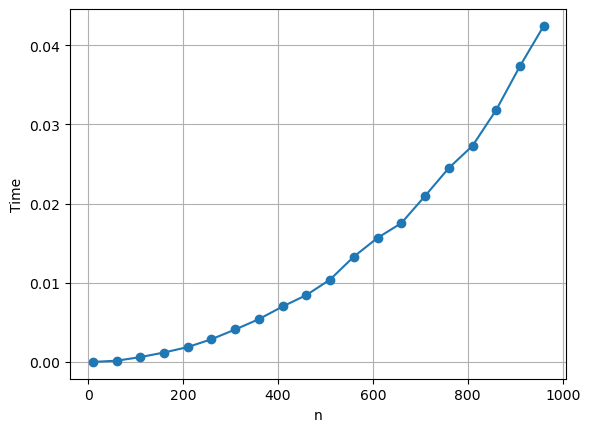

In [44]:
def day_con_tang_dai_nhat(arr):
    dp = [1] * len(arr)
    prev = [-1] * len(arr)

    for i in range(1, len(arr)):
        for j in range(i):
            if arr[i] > arr[j] and dp[i] < dp[j] + 1:
                dp[i] = dp[j] + 1
                prev[i] = j

    # Truy vết dãy con
    n = max(dp)
    index = dp.index(n)
    lis = []
    while index != -1:
        lis.append(arr[index])
        index = prev[index]
    lis.reverse()
    return lis, n


# Test cases
def mesure_performance():
    ns = list(range(10, 1001, 50))
    times = []

    for n in ns:
        arr = [random.randint(1, 100) for _ in range(n)]
        start = time.perf_counter()
        day_con_tang_dai_nhat(arr)
        end = time.perf_counter()
        times.append(end - start)

    plt.plot(ns, times, marker='o')
    plt.xlabel('n')
    plt.ylabel('Time')
    plt.grid(True)
    plt.show()


mesure_performance()

## 3. Bài toán cái túi (0 - 1 Knapsack).

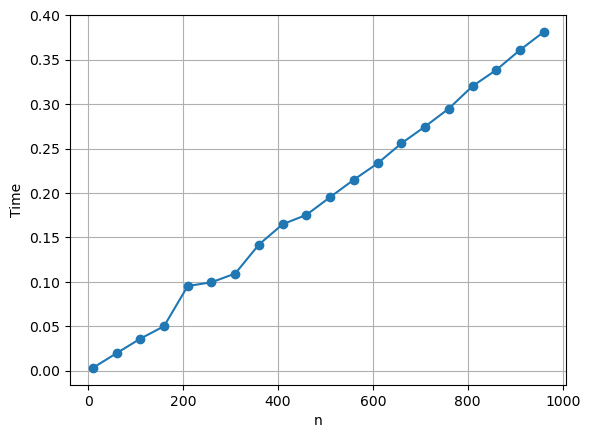

In [45]:
from matplotlib import pyplot as plt
import time
import random


def balo_01(W, weights, values):
    n = len(weights)
    dp = [[0] * (W + 1) for _ in range(n + 1)]

    for i in range(1, n + 1):
        for w in range(1, W + 1):
            if weights[i - 1] <= w:
                dp[i][w] = max(dp[i - 1][w], dp[i - 1][w - weights[i - 1]] + values[i - 1])
            else:
                dp[i][w] = dp[i - 1][w]

    return dp[n][W]

def measure_performance():
    W = 1000
    ns = list(range(10, 1001, 50))
    times = []

    for n in ns:
        weights = [random.randint(1, 100) for _ in range(n)]
        values = [random.randint(1, 100) for _ in range(n)]
        start = time.perf_counter()
        balo_01(W, weights, values)
        end = time.perf_counter()
        times.append(end - start)

    plt.plot(ns, times, marker='o')
    plt.xlabel('n')
    plt.ylabel('Time')
    plt.grid(True)
    plt.show()


measure_performance()

## 4. Cho xâu X có độ dài m, xâu Y có độ dài n. Tìm xâu con chung của X và Y có độ dài lớn nhất.

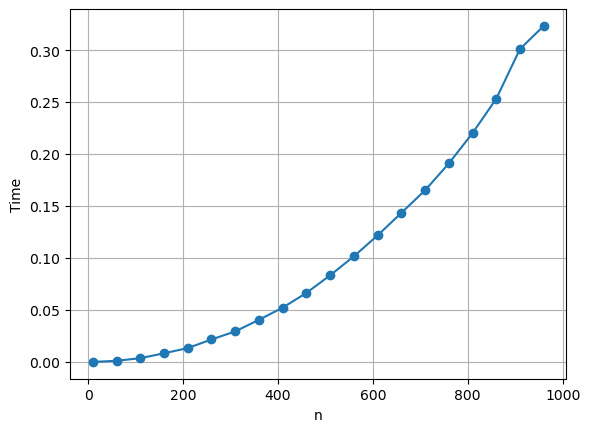

In [46]:
def xau_con_chung(X, Y):
    m = len(X)
    n = len(Y)
    dp = [[0] * (n + 1) for _ in range(m + 1)]

    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if X[i - 1] == Y[j - 1]:
                dp[i][j] = dp[i - 1][j - 1] + 1
            else:
                dp[i][j] = max(dp[i - 1][j], dp[i][j - 1])

    return dp[m][n]

def measure_performance():
    ns = list(range(10, 1001, 50))
    times = []

    for n in ns:
        X = ''.join(random.choices('ABCDEFGHIJKLMNOPQRSTUVWXYZ', k=n))
        Y = ''.join(random.choices('ABCDEFGHIJKLMNOPQRSTUVWXYZ', k=n))
        start = time.perf_counter()
        xau_con_chung(X, Y)
        end = time.perf_counter()
        times.append(end - start)

    plt.plot(ns, times, marker='o')
    plt.xlabel('n')
    plt.ylabel('Time')
    plt.grid(True)
    plt.show()

measure_performance()

## 5. Có n cuộc họp, cuộc họp thứ i bắt đầu tại thời điểm si và kết thúc tại thời điểm fi. Cuộc họp i được bố trí trước cuộc họp j nếu thời điểm kết thúc của cuộc họp i nhỏ hơn hoặc bằng thời điểm bắt đầu j (tức là fi ≤ sj ). Hãy bố trí phòng họp để phục vụ được nhiều cuộc họp nhất.

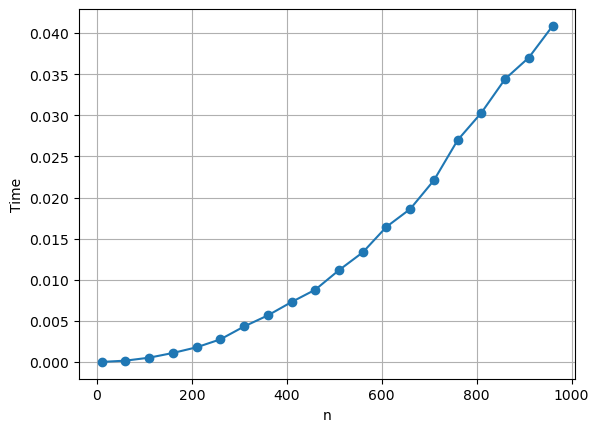

In [47]:
def cuoc_hop(hoat_dong):
    hoat_dong.sort(key=lambda x: x[1])
    n = len(hoat_dong)

    dp = [0] * (n + 1)
    dp[0] = 0

    for i in range(1, n + 1):
        dp[i] = dp[i - 1]
        for j in range(i):
            if hoat_dong[j][1] <= hoat_dong[i - 1][0]:
                dp[i] = max(dp[i], dp[j] + 1)
                break
    return dp[n]

def measure_performance():
    ns = list(range(10, 1001, 50))
    times = []

    for n in ns:
        hoat_dong = [(random.randint(1, 100), random.randint(101, 200)) for _ in range(n)]
        start = time.perf_counter()
        cuoc_hop(hoat_dong)
        end = time.perf_counter()
        times.append(end - start)

    plt.plot(ns, times, marker='o')
    plt.xlabel('n')
    plt.ylabel('Time')
    plt.grid(True)
    plt.show()

measure_performance()

## 6. (Cho thuê máy) Trung tâm tính toán hiệu năng cao nhận được đơn đặt hàng của n khách hàng. Khách hàng i muốn sử dụng máy trong khoảng thời gian từ ai đến bi và trả tiền thuê là ci . Hãy bố trí lịch thuê máy để tổng số tiền thu được là lớn nhất mà thời gian sử dụng máy của 2 khách hàng bất kì được phục vụ đều không giao nhau (cả trung tâm chỉ có một máy cho thuê).

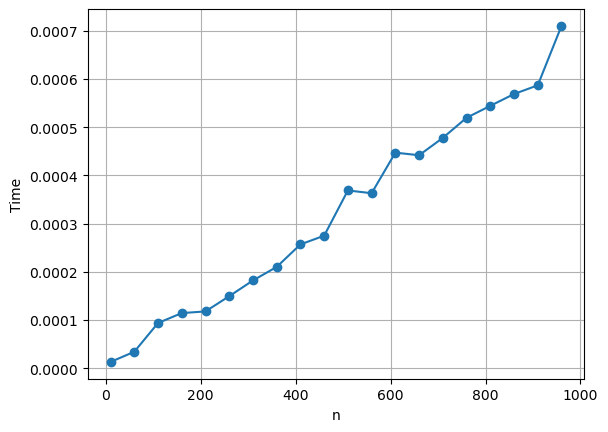

In [48]:
import bisect

def max_rental_profit(jobs):
    jobs.sort(key=lambda x: x[1])  # sort theo end
    n = len(jobs)

    starts = [job[0] for job in jobs]
    ends = [job[1] for job in jobs]
    costs = [job[2] for job in jobs]

    dp = [0] * (n + 1)

    for i in range(1, n + 1):
        s, e, c = jobs[i - 1]
        idx = bisect.bisect_right(ends, s)  # trả về vị trí > s → giảm 1
        dp[i] = max(dp[i - 1], dp[idx] + c)

    return dp[n]


def measure_performance():
    ns = list(range(10, 1001, 50))
    times = []

    for n in ns:
        jobs = [(random.randint(1, 100), random.randint(101, 200), random.randint(1, 100)) for _ in range(n)]
        start = time.perf_counter()
        max_rental_profit(jobs)
        end = time.perf_counter()
        times.append(end - start)

    plt.plot(ns, times, marker='o')
    plt.xlabel('n')
    plt.ylabel('Time')
    plt.grid(True)
    plt.show()

measure_performance()

## 7. (Xếp các khối đá) Cho N khối đá (N ≤ 5000).
Các khối đá đều có dạng hình hộp chữ nhật và được đặc trưng bới 3 kích thước: dài, rộng,
cao. Một cách xây dựng tháp là một cách đặt một số các khối đá trong các khối đá đã cho
chồng lên nhau theo quy tắc:
• Chiều cao mỗi khối đá là kích thước nhỏ nhất trong 3 kích thước.
• Các mép của khối đá được đặt song song với nhau sao cho không có phần nào của
khối trên nằm chìa ra ngoài khối dưới.
Hãy chỉ ra cách để xây dựng được một cái tháp sao cho số khối đá được dùng là nhiều
nhất.

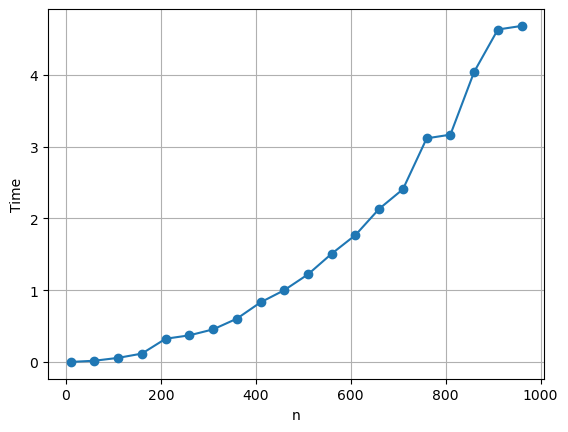

In [50]:
from itertools import permutations

def build_max_tower(boxes):
    all_boxes = []

    for box in boxes:
        for p in permutations(box):
            base1, base2, height = sorted(p, reverse=True)
            all_boxes.append((base1, base2, min(p)))

    all_boxes.sort(reverse=True)

    n = len(all_boxes)
    dp = [1] * n

    for i in range(n):
        for j in range(i):
            if all_boxes[i][0] <= all_boxes[j][0] and all_boxes[i][1] <= all_boxes[j][1]:
                dp[i] = max(dp[i], dp[j] + 1)

    return max(dp)

def measure_performance():
    ns = list(range(10, 1001, 50))
    times = []

    for n in ns:
        boxes = [(random.randint(1, 100), random.randint(1, 100), random.randint(1, 100)) for _ in range(n)]
        start = time.perf_counter()
        build_max_tower(boxes)
        end = time.perf_counter()
        times.append(end - start)

    plt.plot(ns, times, marker='o')
    plt.xlabel('n')
    plt.ylabel('Time')
    plt.grid(True)
    plt.show()

measure_performance()

## 8. (Farmer (IOI 2004)) Một người có N mảnh đất và M dải đất. Các mảnh đất có thể coi là một tứ giác và các dải đất thì coi như một đường thẳng. Dọc theo các dải đất ông ta trồng các cây bách, dải đất thứ i có Ai cây bách. Ông ta cũng trồng các cây bách trên viền của các mảnh đất, mảnh đất thứ j có Bj cây bách. Cả ở trên các mảnh đất và dải đất, xen giữa 2 cây bách ông ta trồng một cây liu. Ông ta cho con trai được chọn các mảnh đất và dải đất tuỳ ý với điều kiện tổng số cây bách không vượt quá Q. Người con trai phải chọn thế nào để có nhiều cây ôliu (loài cây mà anh ta thích) nhất.

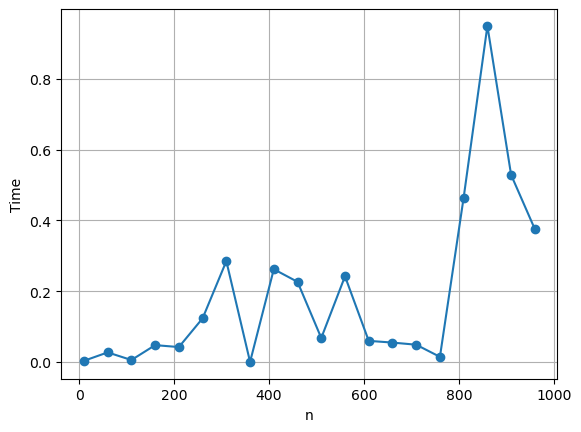

In [53]:
def max_olive_trees(N, M, Q, A, B):
    olive_on_land = [b - 1 for b in B]
    olive_on_strip = [a - 1 for a in A]

    dp = [-float('inf')] * (Q + 1)
    dp[0] = 0

    for b in olive_on_land:
        for q in range(Q, B[olive_on_land.index(b)] - 1, -1):
            dp[q] = max(dp[q], dp[q - B[olive_on_land.index(b)]] + b)

    for a in olive_on_strip:
        for q in range(Q, A[olive_on_strip.index(a)] - 1, -1):
            dp[q] = max(dp[q], dp[q - A[olive_on_strip.index(a)]] + a)

    return max(dp)

def measure_performance():
    ns = list(range(10, 1001, 50))
    times = []

    for n in ns:
        N = random.randint(1, n)
        M = random.randint(1, n)
        Q = random.randint(1, 1000)
        A = [random.randint(1, 100) for _ in range(M)]
        B = [random.randint(1, 100) for _ in range(N)]
        start = time.perf_counter()
        max_olive_trees(N, M, Q, A, B)
        end = time.perf_counter()
        times.append(end - start)

    plt.plot(ns, times, marker='o')
    plt.xlabel('n')
    plt.ylabel('Time')
    plt.grid(True)
    plt.show()

measure_performance()